In [1]:
import numpy as np
from sif.kernels import SquaredExponentialKernel, MaternKernel
from sif.models import GaussianProcess
from sif.acquisitions import ExpectedImprovement, ImprovementProbability

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

Create random data.

In [3]:
X = np.random.uniform(size=(5, 1))
y = np.random.normal(np.cos(20.*(X+1.)) / (np.abs(X) + 1.), 0.01).ravel()
X_pred = np.atleast_2d(np.linspace(0., 1., num=500)).T
y_best = y.max()

Create the Gaussian process object.

In [4]:
length_scales = np.array([0.1, ])
gp = GaussianProcess(SquaredExponentialKernel(length_scales), 0.001)
gp.fit(X, y)

In [5]:
n_samples = 10000
samples = gp.sample(X_pred, n_samples)

Create the acquisition functions. These are expected improvement and improvement probability.

In [6]:
pi_acq = ImprovementProbability(gp)
ei_acq = ExpectedImprovement(gp)

Visualize how well the empirical acquisition functions (based on sampling from the Gaussian process) conform to the theoretical values. We also visualize the interpolation of the dataset.

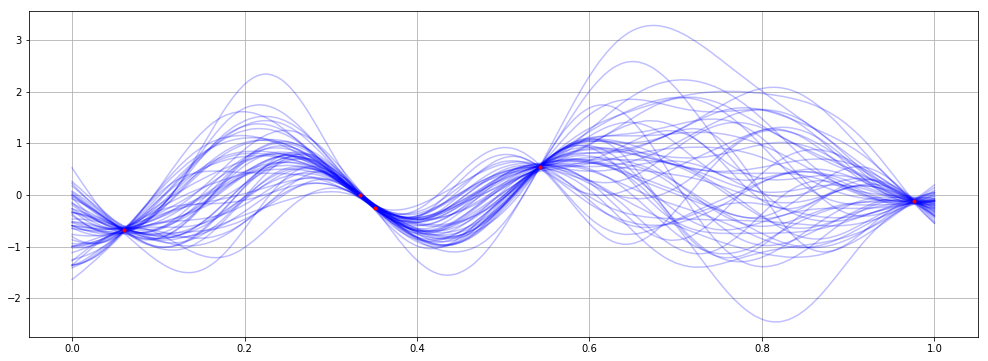

In [7]:
plt.figure(figsize=(17, 6))
for i in range(50):
    plt.plot(X_pred.ravel(), samples[i], "b-", alpha=0.25)
plt.plot(X.ravel(), y.ravel(), "r.")
plt.grid()
plt.show()

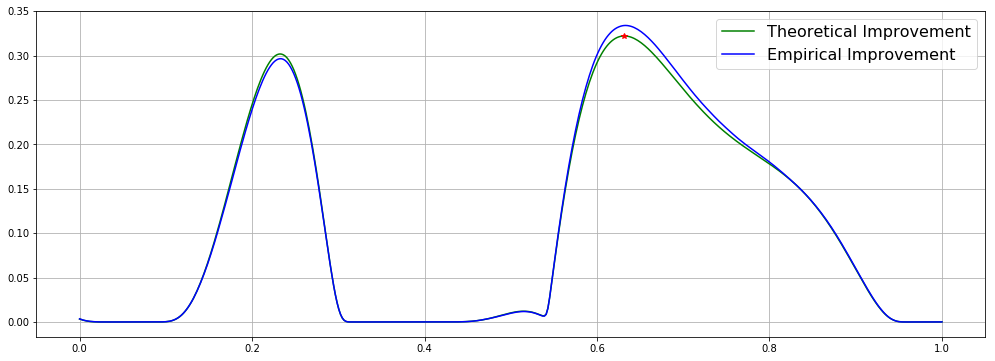

In [8]:
ei_emp = ((samples - y_best) * (samples > y_best)).mean(axis=0)
ei_x, ei_max = ei_acq.select()
plt.figure(figsize=(17, 6))
plt.plot(X_pred.ravel(), ei_acq.evaluate(X_pred), "g-", label="Theoretical Improvement")
plt.plot(X_pred.ravel(), ei_emp, "b-", label="Empirical Improvement")
plt.plot(ei_x, ei_max, "r*")
plt.grid()
plt.legend(fontsize=16)
plt.show()

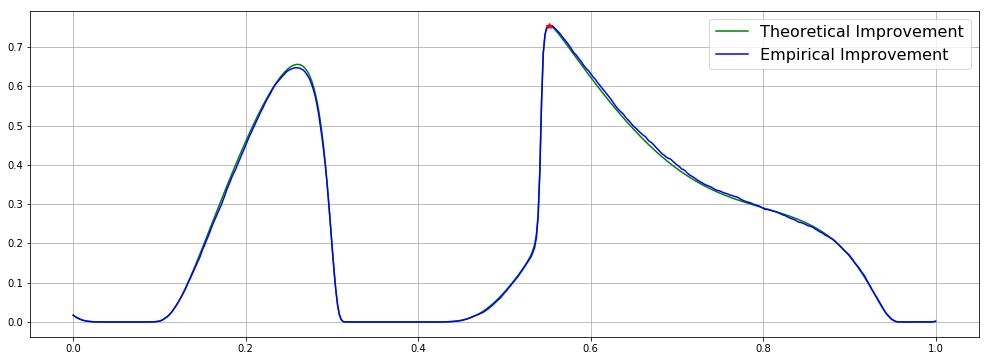

In [9]:
pi_emp = (samples > y_best).mean(axis=0)
pi_x, pi_max = pi_acq.select()
plt.figure(figsize=(17, 6))
plt.plot(X_pred.ravel(), pi_acq.evaluate(X_pred), "g-", label="Theoretical Improvement")
plt.plot(X_pred.ravel(), pi_emp, "b-", label="Empirical Improvement")
plt.plot(pi_x, pi_max, "r*")
plt.grid()
plt.legend(fontsize=16)
plt.show()